In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
# Evaluations
from sklearn.metrics import classification_report,confusion_matrix
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
# TensorFlow
import tensorflow as tf

In [18]:
cnt = pd.read_csv("carbon_nanotubes.csv")
cnt.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [19]:
cnt.columns

Index(['Chiral indice n', 'Chiral indice m', 'Initial atomic coordinate u',
       'Initial atomic coordinate v', 'Initial atomic coordinate w',
       'Calculated atomic coordinates u'', 'Calculated atomic coordinates v'',
       'Calculated atomic coordinates w''],
      dtype='object')

In [20]:
cnt.columns=['chiral_index_n', 'chiral_index_m', 'initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']
cnt_nn = cnt[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']]
cnt_nn.head()

,chiral_index_n,chiral_index_m,initial_coord_u,initial_coord_v,initial_coord_w,calc_coord_u,calc_coord_v,calc_coord_w
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [21]:
cnt_nn.replace(',','.', inplace = True, regex=True)
cnt_nn = cnt_nn.apply(pd.to_numeric)

In [22]:
x_set = cnt_nn[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w']]
y_set = cnt_nn[['calc_coord_u', 'calc_coord_v', 'calc_coord_w']]

In [23]:
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2)

In [24]:
# scale the dataset because of two features n and m
train = preprocessing.scale(x_train)
test = preprocessing.scale(y_test)

In [25]:
print(x_train.shape, x_test.shape)

(8576, 5) (2145, 5)


In [26]:
y_train.head()

,calc_coord_u,calc_coord_v,calc_coord_w
7075,0.460121,0.844434,0.518988
6327,0.659633,0.905765,0.188819
8493,0.933921,0.679344,0.052250
2144,0.372478,0.128338,0.440077
1646,0.631275,0.243419,0.582072


### Random Forest

In [29]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [44]:
#This gives the R^2 based on the oob prediction - for training data
model.oob_score_

0.9979754390838913

In [43]:
#for testing dataset
model.score(x_test, y_test)

0.9975451931755407

In [62]:
Y_pred = model.predict(x_test)

In [103]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.007125063367521378
Mean Squared Error: 0.00021042755484825654
Root Mean Squared Error: 0.014506121288899268


In [104]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: calc_coord_u    0.01
calc_coord_v    0.01
calc_coord_w    0.01
dtype: float64 degrees.
Accuracy: calc_coord_u    97.14
calc_coord_v    96.78
calc_coord_w     -inf
dtype: float64 %.


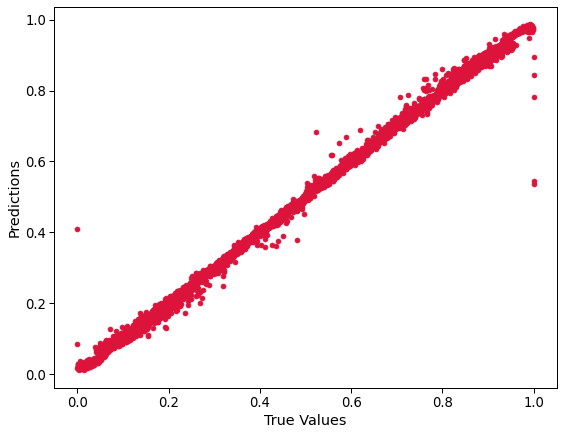

In [83]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

plt.scatter(y_test, Y_pred, color='crimson')
plt.xlabel("True Values")
plt.ylabel("Predictions")

ax1_name = 'True_vs_Predicted_value_for_RF' + '.tiff'
plt.savefig(ax1_name, dpi=300);

plt.show()

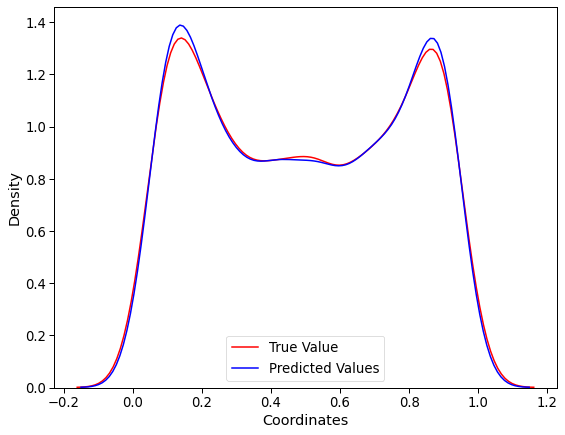

In [100]:
fig, (ax3) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax3 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

ax3 = sns.distplot(y_test, hist=False, color="r", label="True Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax3)
plt.xlabel('Coordinates')
plt.ylabel('Density')

ax3_name = 'True_vs_Predicted_value_distplot__for_RF' + '.jpeg'
plt.savefig(ax3_name, dpi=300);


plt.show()
plt.close()

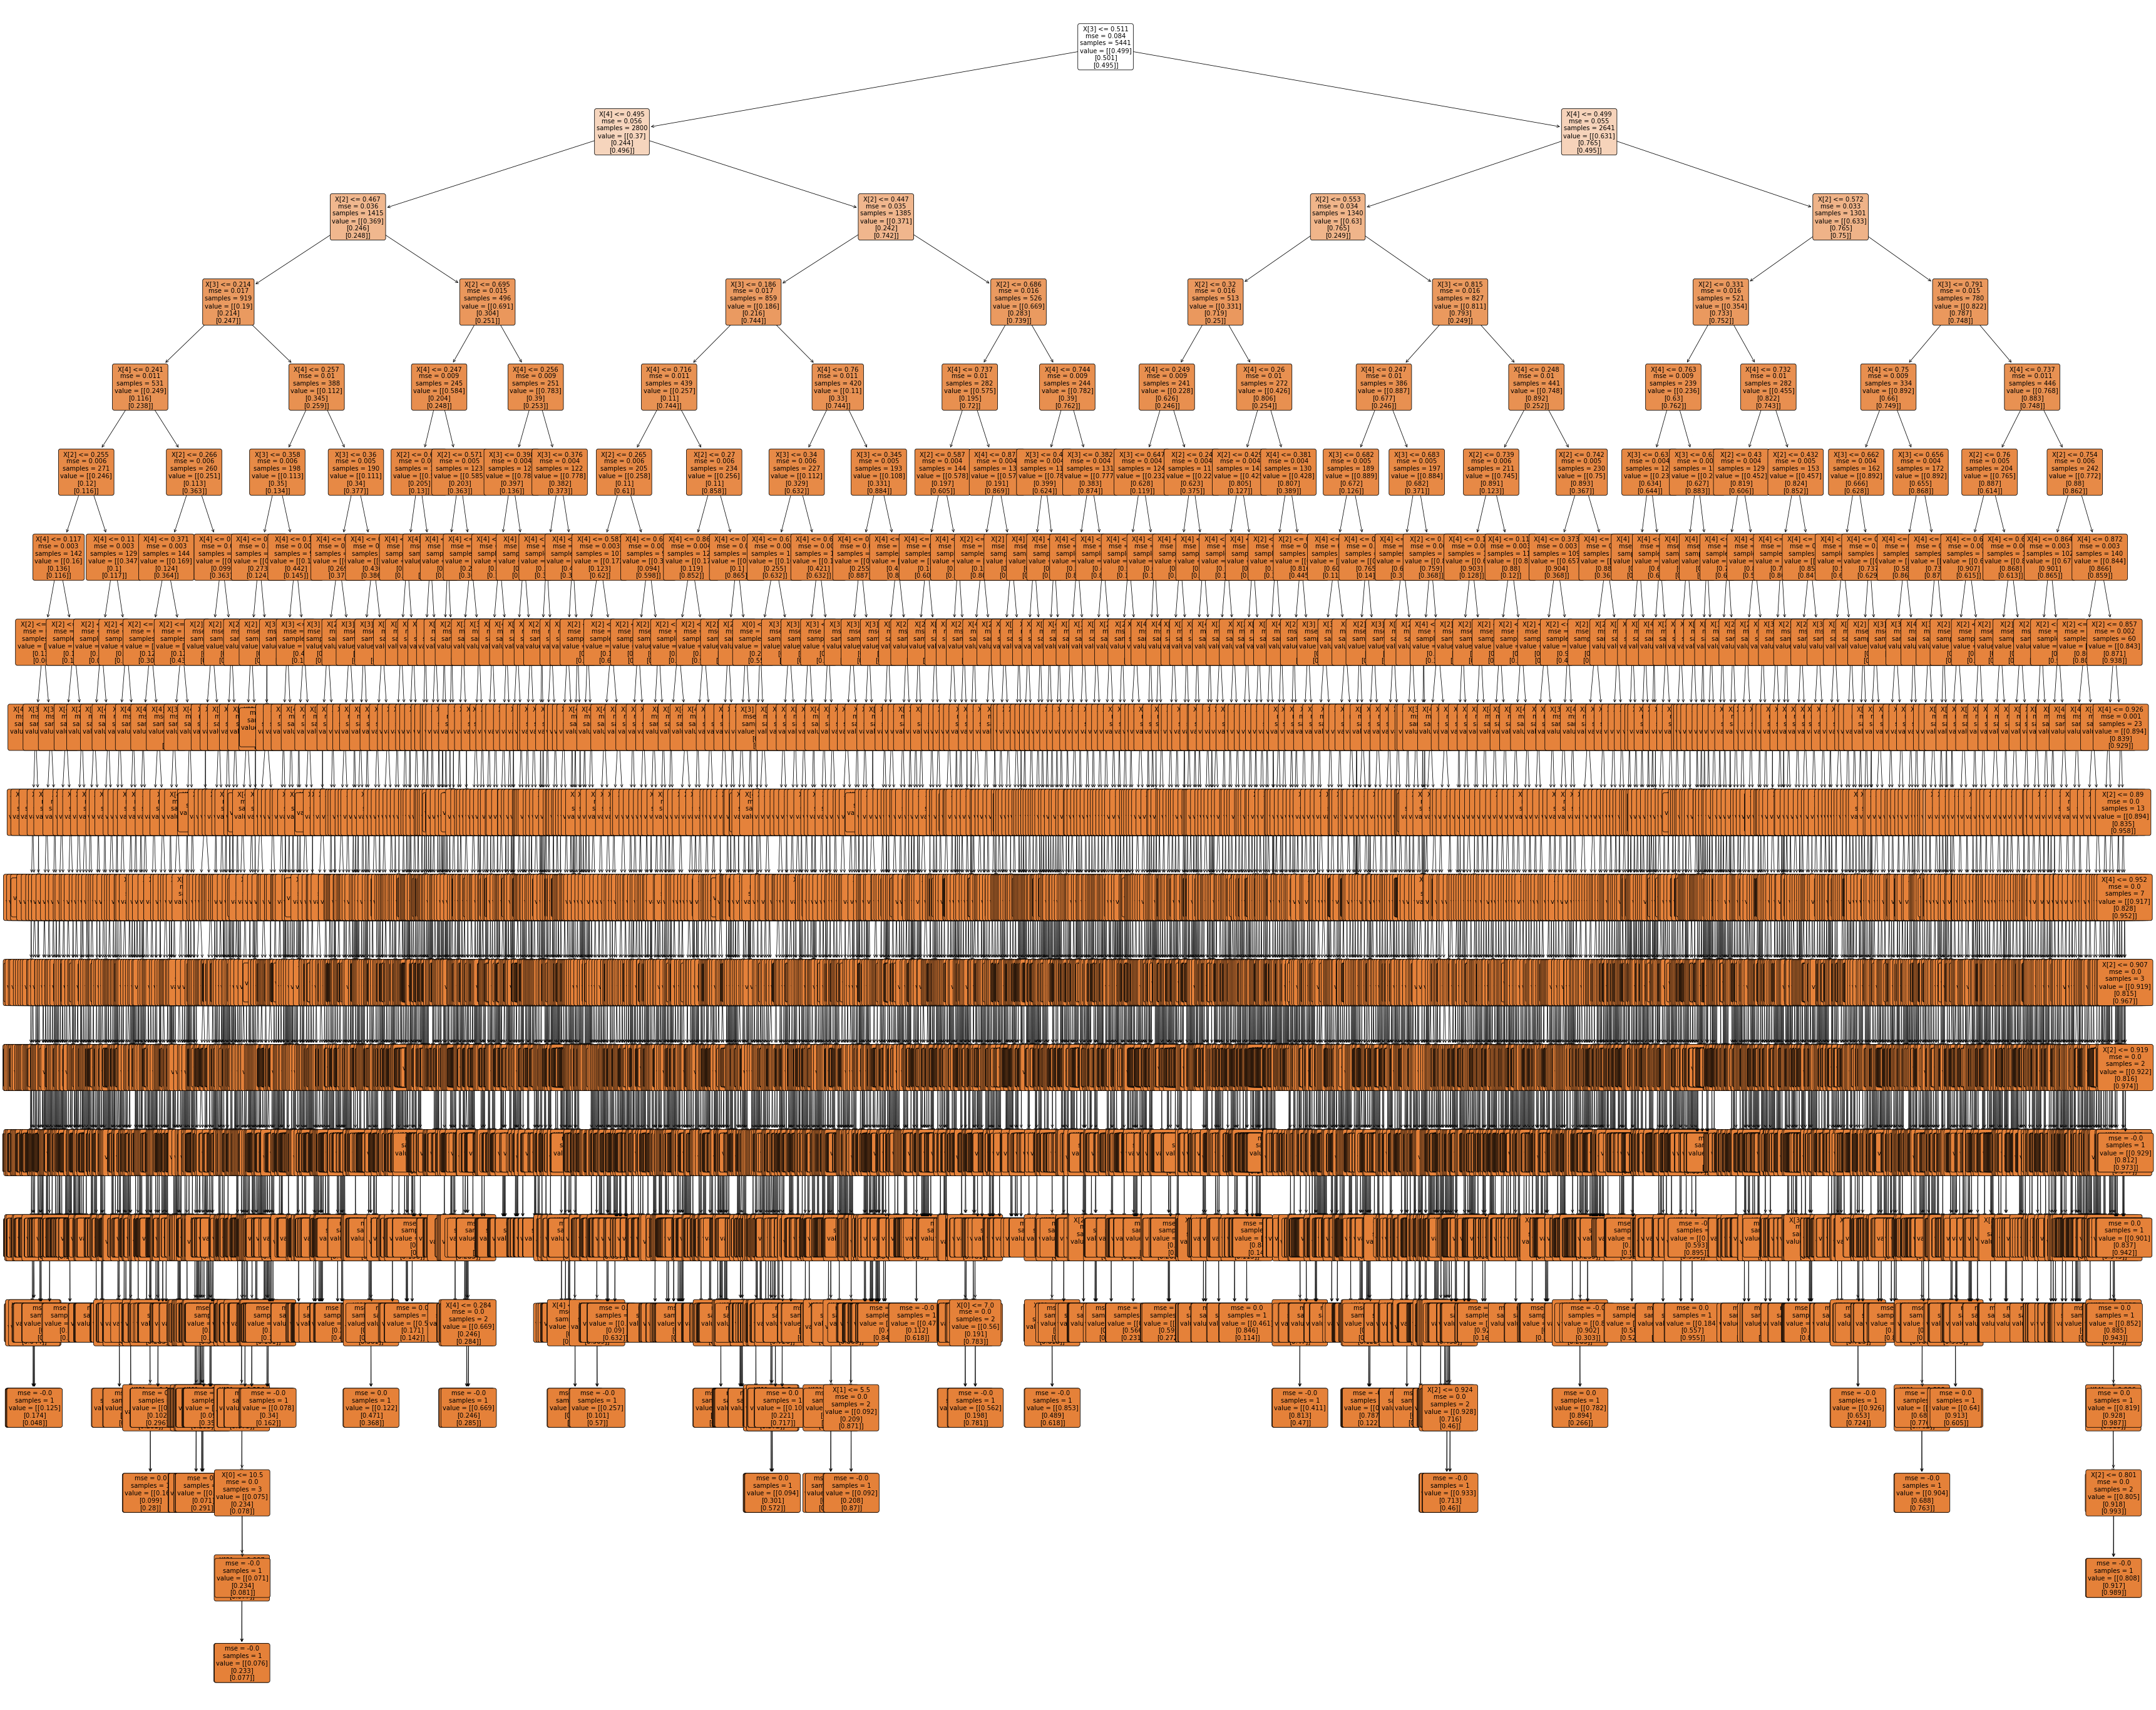

In [97]:
import pydot
# Pull out one tree from the forest
Tree = model.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(60,50))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=10);